In [ ]:
# Codes are adapted from http://bit.ly/2U7ttYT (파이토치 첫걸음,한빛미디어)

# Convolution Transposed Exercise

- torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
- 다양한 세팅에서 전치 컨볼루션 연산이 어떻게 동작하는지 확인해보는 노트북입니다.

## 1. Import Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes' 

/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes


In [3]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

print(torch.__version__)

1.8.1+cu101


## 2. Input Data

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


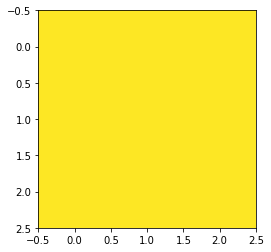

In [4]:
# 입력으로 1로 채워진 텐서를 생성합니다.
img = torch.ones(1,1,3,3)
print(img)

plt.imshow(img.numpy()[0,0,...],vmin=0)

## 3. Set All Weights to One

In [5]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, output_padding=0, bias=False)
#print(transpose.weight.data)

# 결과를 확인하기 쉽게 전치 컨볼루션 연산의 가중치를 1로 초기화합니다.
init.constant_(transpose.weight.data,1)

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])

## Kernel Size=3, stride=1, padding=0, output_padding=0

In [6]:
out = transpose(img)
print(out,out.size())

plt.imshow(out.detach().numpy()[0,0,...],vmin=0)
plt.show()

tensor([[[[1., 2., 3., 2., 1.],
          [2., 4., 6., 4., 2.],
          [3., 6., 9., 6., 3.],
          [2., 4., 6., 4., 2.],
          [1., 2., 3., 2., 1.]]]], grad_fn=<SlowConvTranspose2DBackward>) torch.Size([1, 1, 5, 5])


## Kernel Size=3, stride=2, padding=0, output_padding=0

tensor([[[[1., 1., 2., 1., 2., 1., 1.],
          [1., 1., 2., 1., 2., 1., 1.],
          [2., 2., 4., 2., 4., 2., 2.],
          [1., 1., 2., 1., 2., 1., 1.],
          [2., 2., 4., 2., 4., 2., 2.],
          [1., 1., 2., 1., 2., 1., 1.],
          [1., 1., 2., 1., 2., 1., 1.]]]],
       grad_fn=<SlowConvTranspose2DBackward>) torch.Size([1, 1, 7, 7])


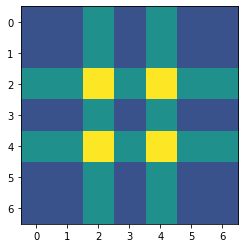

In [7]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0, output_padding=0, bias=False)
init.constant_(transpose.weight.data,1)
out = transpose(img)

print(out,out.size())
plt.imshow(out.detach().numpy()[0,0,...],vmin=0)

## Kernel Size=3, stride=2, padding=1, output_padding=0

tensor([[[[1., 2., 1., 2., 1.],
          [2., 4., 2., 4., 2.],
          [1., 2., 1., 2., 1.],
          [2., 4., 2., 4., 2.],
          [1., 2., 1., 2., 1.]]]], grad_fn=<SlowConvTranspose2DBackward>) torch.Size([1, 1, 5, 5])


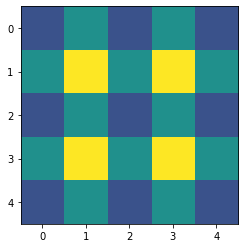

In [8]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=0, bias=False)
init.constant_(transpose.weight.data,1)
out = transpose(img)

print(out,out.size())
plt.imshow(out.detach().numpy()[0,0,...],vmin=0)

## Kernel Size=3, stride=2, padding=0, output_padding=1

tensor([[[[1., 1., 2., 1., 2., 1., 1., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [2., 2., 4., 2., 4., 2., 2., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [2., 2., 4., 2., 4., 2., 2., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [1., 1., 2., 1., 2., 1., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]],
       grad_fn=<SlowConvTranspose2DBackward>) torch.Size([1, 1, 8, 8])


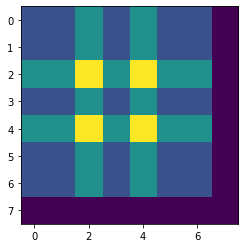

In [9]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0, output_padding=1, bias=False)
init.constant_(transpose.weight.data,1)
out=transpose(img)

print(out,out.size())
plt.imshow(out.detach().numpy()[0,0,...],vmin=0)

## Kernel Size=3, stride=2, padding=1, output_padding=1

In [10]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)
init.constant_(transpose.weight.data,1)

out = transpose(img)
print(out,out.size())
plt.imshow(out.detach().numpy()[0,0,...],vmin=0)

tensor([[[[1., 2., 1., 2., 1., 1.],
          [2., 4., 2., 4., 2., 2.],
          [1., 2., 1., 2., 1., 1.],
          [2., 4., 2., 4., 2., 2.],
          [1., 2., 1., 2., 1., 1.],
          [1., 2., 1., 2., 1., 1.]]]], grad_fn=<SlowConvTranspose2DBackward>) torch.Size([1, 1, 6, 6])


tensor([[[[1., 2., 2., 2., 2., 1.],
          [2., 4., 4., 4., 4., 2.],
          [2., 4., 4., 4., 4., 2.],
          [2., 4., 4., 4., 4., 2.],
          [2., 4., 4., 4., 4., 2.],
          [1., 2., 2., 2., 2., 1.]]]], grad_fn=<ThnnConvTranspose2DBackward>) torch.Size([1, 1, 6, 6])


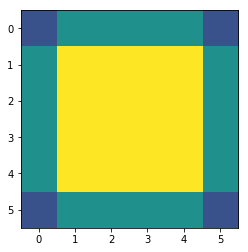

In [ ]:
transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=4, stride=2, padding=1, output_padding=0, bias=False)
init.constant_(transpose.weight.data,1)

out = transpose(img)
print(out,out.size())
plt.imshow(out.detach().numpy()[0,0,...],vmin=0)